In [1]:
import pandas as pd
import numpy as np

In [2]:
#/data/폴더의 CCTV_in_Seoul.csv 파일을 읽어서 CCTV_Seoul에 대입
CCTV_Seoul = pd.read_csv('./data/CCTV_in_Seoul.csv',  encoding='utf-8')

In [3]:
CCTV_Seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [4]:
#CCTV_Seoul의 컬럼명을 조회
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
#CCTV_Seoul의 첫번째 컬럼명을 조회
CCTV_Seoul.columns[0]

'기관명'

In [6]:
#CCTV_Seoul의 첫번째 컬럼을 "구벌" 로 수정
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)

In [7]:
#첫번째 줄부터 5줄 출력
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
#서울시 각 구별 인구현황 엑셀 파일을 읽어서 pop_Seoul에 대입
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls',  encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [9]:
#인덱스 2 부터 시작
#0번째 줄은 삭제되고 1번째 줄이 컬럼명이 됨
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls', 
                          header = 2,                          
                          encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0
4,2017.1/4,성동구,130868.0,311244.0,153768.0,157476.0,303380.0,150076.0,153304.0,7864.0,3692.0,4172.0,2.32,39997.0


In [10]:
#'B, D, G, J, N' 컬럼만 리턴
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls', 
                          header = 2, 
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',    #0번째 컬럼의 제목을 "구별" 로 수정
                          pop_Seoul.columns[1] : '인구수',  #1번째 컬럼의 제목을 "인구수" 로 수정
                          pop_Seoul.columns[2] : '한국인',  #2번째 컬럼의 제목을 "한국인" 로 수정
                          pop_Seoul.columns[3] : '외국인',   #3번째 컬럼의 제목을 "외국인" 로 수정
                          pop_Seoul.columns[4] : '고령자'}, #4번째 컬럼의 제목을 "고령자" 로 수정
                 inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
#0번째 줄 삭제
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [13]:
#구별 컬럼에 저장된 값이 null이면 True 아니면 False 출력
pop_Seoul['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [14]:
#pop_Seoul['구별'].isnull()이 True인 줄 조회
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [15]:
#pop_Seoul 에서 26번째 줄 삭제
pop_Seoul.drop([26], inplace=True)

In [16]:
#pop_Seoul에서 마지막 줄 출력
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [17]:
#외국인 비율과 고령자 비율을 계산해서 컬럼 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [18]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, #CCTV_seoul(CCTV수) 와 pop_Seoul (인구수)를 병합
                       on='구별' #병합의 기준이 되는 컬럼은 구별
                      )
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
#컬럼 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [20]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#파이썬 그래프에는 한글 폰트가 없어서 한글이 출력않됨

#한글 폰트의 경로를 설정
path = "c:/Windows/Fonts/malgun.ttf"
#path에 저장된 폰트파일의 폰트명을 font_name에 대입
font_name = font_manager.FontProperties(fname=path).get_name()
#폰트 설정
rc('font', family=font_name)

In [22]:
data_result.head()

,구별,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [23]:
#구별 컬럼(각 구의 이름) 을 줄 인덱스로 설정
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


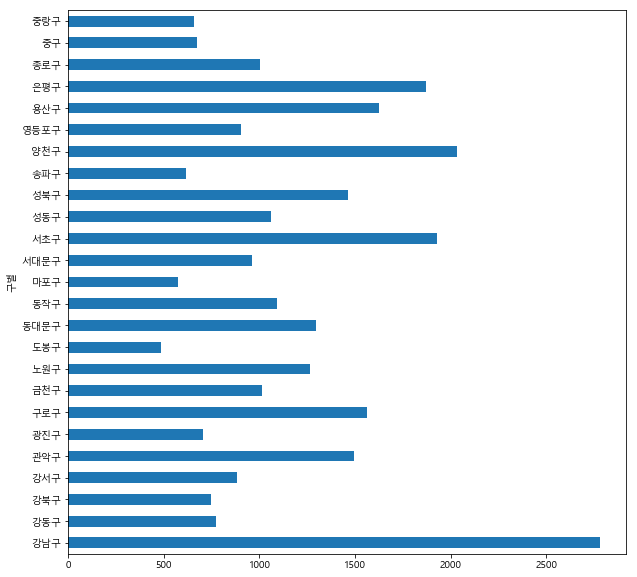

In [24]:
#그래프 그리기 준비
plt.figure()
#소계데이터를 그래프로 그림
data_result['소계'].plot(kind='barh',  #수평방향으로 바 그래프를 그림
                       grid=False,    #그래프 눈금을 출력하지 않음 
                       figsize=(10,10)) #그래프의 가로 세로를 설정
plt.show()

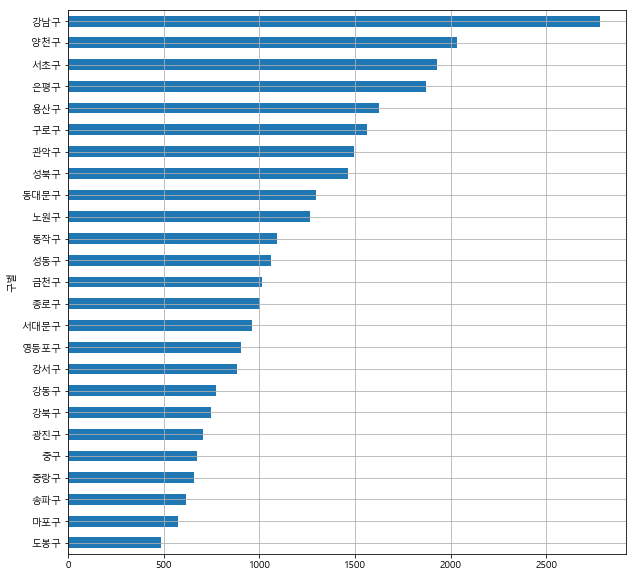

In [25]:
#소계의 내림차순으로 정렬
data_result['소계'].sort_values().plot(kind='barh', #가로 바 그래프를 출력 
                    grid=True,       #그래프의 눈금을 출력
                    figsize=(10,10)) #그래프의 가로 세로 설정
plt.show()

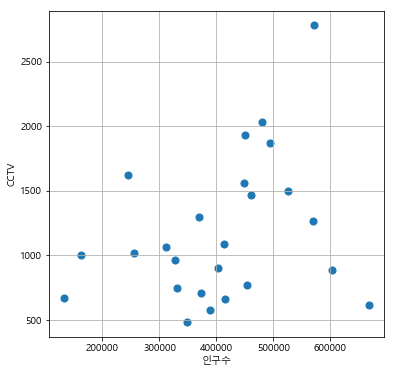

In [26]:
#그래프의 가로 세로 설정
plt.figure(figsize=(6,6))
#데이터의 점 그래프 출력
plt.scatter(data_result['인구수'], #X좌표 설정
            data_result['소계'], #y좌표 설정
            s=50) #점의 크기 설정
#x축 설정
plt.xlabel('인구수')
#y축 설정
plt.ylabel('CCTV')
#그래프의 격자 출력
plt.grid()
#그래프 출력
plt.show()

In [27]:
#인구수와 소계 사이의 단순 선형 회귀 식을 생성
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [28]:
#값을 입력하면 선형회귀 식을 계산해서 리턴하는 함수 f1생성
f1 = np.poly1d(fp1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [29]:
#함수의 입력값 (10000*0.00130916415)+ 645.066497 를 리턴
f1(10000)

658.158138097162

In [30]:
(10000*0.00130916415)+645.066497

658.1581385000001

In [31]:
#10000 이상 700000 이하인 숫자 100개를 생성해서 fx에 대입
fx = np.linspace(100000, 700000, 100)
#fx에 저장된 숫자의 개수를 출력
len(fx)

100

In [32]:
#fx출력
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

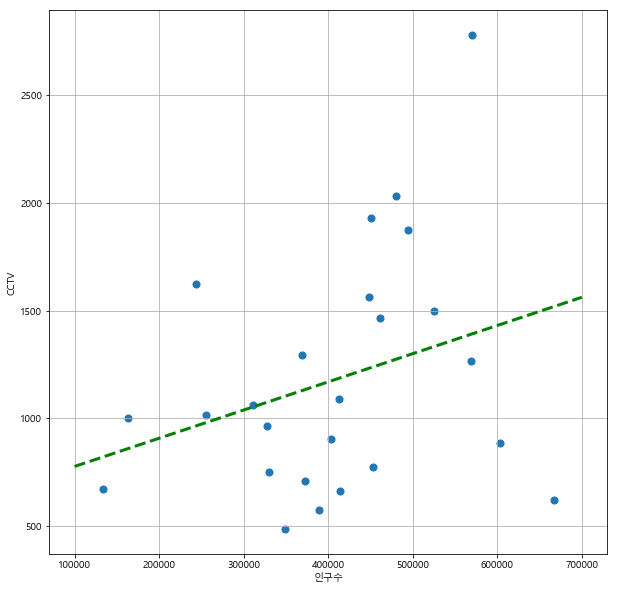

In [33]:
#그래프의 가로 세로 설정
plt.figure(figsize=(10,10))
#인구수를 X좌표 CCTV 소계를 y좌표로 그래프 그리기 크기는 50
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
#fx를 x좌표 f1(fx)를 y좌표 선은 점선 선두께 3 녹색으로 직선그래프 그림
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
#x좌표 설정
plt.xlabel('인구수')
#y좌표 설정
plt.ylabel('CCTV')
#그래프 격자 그리기
plt.grid()
#그래프 출력
plt.show()

In [34]:
#인구수가 높은 순으로 정렬해서 df_sort에 대입
df_sort = data_result.sort_values(by='인구수', ascending=False)
df_sort.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
송파구,618,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


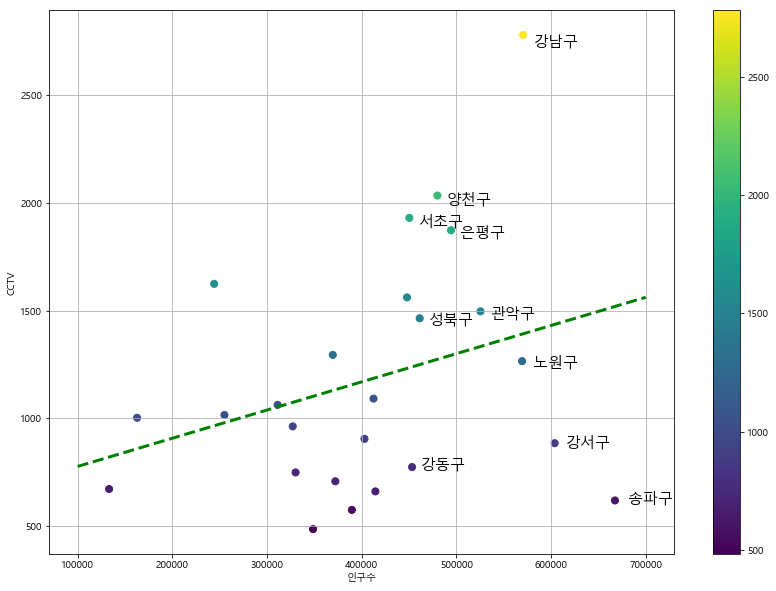

In [35]:
#그래프의 가로 세로 설정
plt.figure(figsize=(14,10))
#인구수를 X좌표 소계를 y좌표 로 설정해서 산점도 그리기
plt.scatter(data_result['인구수'], data_result['소계'], 
            #소계를 기준으로 색을 설정
            c=data_result['소계'], s=50)
#fx를 x좌표 f1을 y좌표 점선 선두께 3 녹색 으로 선그래프 그림
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

#인구수가 가장 높은 10개의 구의 이름 출력
for n in range(10):
    #인구수*1.02 를 x좌표 소계*0.98을 y좌표
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], #구 이름을 출력
             fontsize=15) #글자 사이즈는 15
    
plt.xlabel('인구수') #x좌표 제목
plt.ylabel('CCTV') #y좌표 제목
plt.colorbar() #컬러바 출력
plt.grid() #격자 출력
plt.show() #그래프 출력